In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
## %cd /content/drive/MyDrive/Cancer_Hints_Project/



In [4]:
random_state = 1234

In [5]:
hints_data = pd.read_csv("../Data/final_hints_dataset.csv")

In [6]:
print(hints_data.shape)
hints_data.head()

(2422, 41)


,BornInUSA,NotHisp,Mexican,PuertoRican,Cuban,OthHisp,White,Black,AmerInd,AsInd,...,CancerAttention_PrintNews,GeneralHealth,OwnAbilityTakeCareHealth,MedConditions_Diabetes,MedConditions_HighBP,MedConditions_HeartCondition,MedConditions_LungDisease,MedConditions_Arthritis,MedConditions_Depression,EverHadCancer
0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,3.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,3.0,3.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,0.0


In [7]:
cancer_counts = hints_data['EverHadCancer'].value_counts()
cancer_counts

EverHadCancer
0.0    2123
1.0     299
Name: count, dtype: int64

In [8]:
X,y = hints_data.drop(["EverHadCancer"], axis=1), hints_data.EverHadCancer
print(X.shape)

(2422, 40)


##Train-Test Split

In [9]:
#hints_data = pd.read_csv("/content/drive/MyDrive/Cancer_Hints_Project/Data/final_hints_dataset.csv")
X,y = hints_data.drop(["EverHadCancer"], axis=1), hints_data.EverHadCancer
print(X.shape)
random_state = 1234
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)

(2422, 40)


## Perform feature selection

In [10]:
# Create the RFE object with the desired number of features
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=1)

# Fit the RFE object to the training data
rfe.fit(X_train, y_train)

print("Number of selected features:", rfe.n_features_)
print("Selected features:", rfe.support_)
selected_features = X_train.columns[rfe.support_]
print("Names of selected features:", selected_features)
print("Names of selected features:", rfe.ranking_)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Number of selected features: 1
Selected features: [False False False False False False False False False False  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]
Names of selected features: Index(['Chinese'], dtype='object')
Names of selected features: [ 4 32  6 18 38  8  7 35 17 12  1  3 10 14 13 23 39 40 33  9 28  2 30 36
 31 22 34 26 19 24 20 25 16 27 29 37  5 11 21 15]


## *Arranging features in increase order of ranking in a variable*

In [11]:
ranked_features = sorted(zip(rfe.ranking_, X.columns), key=lambda x: x[0])
print(ranked_features)

[(1, 'Chinese'), (2, 'AgeGrpB'), (3, 'Filipino'), (4, 'BornInUSA'), (5, 'MedConditions_HeartCondition'), (6, 'Mexican'), (7, 'White'), (8, 'OthHisp'), (9, 'OthPacIsl'), (10, 'Japanese'), (11, 'MedConditions_LungDisease'), (12, 'AsInd'), (13, 'Vietnamese'), (14, 'Korean'), (15, 'MedConditions_Depression'), (16, 'GeneralHealth'), (17, 'AmerInd'), (18, 'PuertoRican'), (19, 'CancerAttention_LocalTV'), (20, 'CancerAttention_OnlineNews'), (21, 'MedConditions_Arthritis'), (22, 'HHInc'), (23, 'OthAsian'), (24, 'CancerAttention_NatTV'), (25, 'CancerAttention_PrintNews'), (26, 'CancerAttention_Internet'), (27, 'OwnAbilityTakeCareHealth'), (28, 'GenderC'), (29, 'MedConditions_Diabetes'), (30, 'BMI'), (31, 'EducA'), (32, 'NotHisp'), (33, 'Samoan'), (34, 'CancerAttention_HealthNews'), (35, 'Black'), (36, 'CENSDIV'), (37, 'MedConditions_HighBP'), (38, 'Cuban'), (39, 'Hawaiian'), (40, 'Guamanian')]


##**Defining functions for model training with over and under sampling**

In [12]:
random_state = 1234
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)
def trainRFClassisfier_OS(X, y):
  # Oversample the minority class using SMOTE
  sm = SMOTE(random_state=random_state)
  X_resampled, y_resampled = sm.fit_resample(X, y)
  X_tr, X_val, y_tr, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=random_state)
  #X_tr, X_val, y_tr, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2)
  rfc = RandomForestClassifier(random_state=random_state, n_estimators=40)
  rfc.fit(X_tr, y_tr)
  return rfc, rfc.score(X_tr, y_tr), rfc.score(X_val, y_val)

def trainRFClassisfier_US(X, y):
  # Undersampling the minority class using RandomUnderSampler
  rus = RandomUnderSampler(random_state=random_state)
  X_resampled, y_resampled = rus.fit_resample(X, y)
  X_tr, X_val, y_tr, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=random_state)
  #X_tr, X_val, y_tr, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2)
  rfc = RandomForestClassifier(random_state=random_state, n_estimators=40)
  rfc.fit(X_tr, y_tr)
  return rfc, rfc.score(X_tr, y_tr), rfc.score(X_val, y_val)

## **Training models by including rankwise features (Oversampling)**
*I'm starting with 5 minimum features and increasing the number of features with one feature at a time in increasing order of feature ranking to train model on training data and test it on test data.*

In [13]:
accuracies = []
sensitivities = []
specificities = []
tr_acc = []
#precisions = []

for i in range(5, 41):
  selected_features = X_train.columns[rfe.ranking_ <= i]
  model, train_acc, val_acc = trainRFClassisfier_OS(X_train[selected_features], y_train)
  y_pred = model.predict(X_test[selected_features])
  cm = confusion_matrix(y_test, y_pred)
  accuracies.append(model.score(X_test[selected_features], y_test))
  sensitivities.append(cm[0, 0] / (cm[0, 0] + cm[0, 1]))
  specificities.append(cm[1, 1] / (cm[1, 0] + cm[1, 1]))
  tr_acc.append(train_acc)
  #precisions.append(cm[1, 1] / (cm[1, 1] + cm[0, 1]))


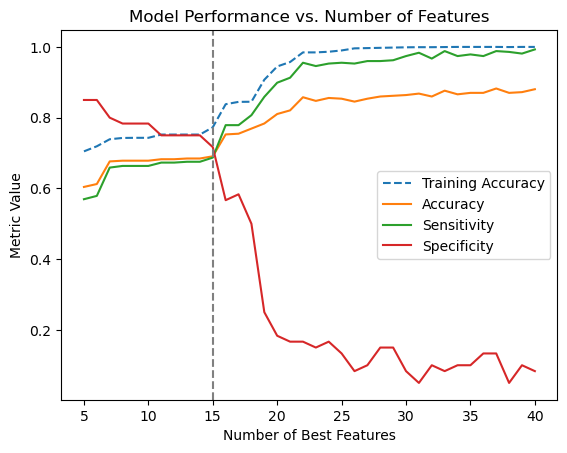

In [14]:
# Plot the results
plt.plot(range(5, 41), tr_acc, label="Training Accuracy", linestyle='--')
plt.plot(range(5, 41), accuracies, label="Accuracy")
plt.plot(range(5, 41), sensitivities, label="Sensitivity")
plt.plot(range(5, 41), specificities, label="Specificity")
#plt.plot(range(5, 41), precisions, label="Precision")
plt.xlabel("Number of Best Features")
plt.ylabel("Metric Value")
plt.title("Model Performance vs. Number of Features")
plt.legend()
plt.axvline(x=15, color='grey', linestyle='--')
plt.show()

## **Final model with best 15 features**
> This model is based on model training performed by oversampling

Confusion Matrix:
[[292 133]
 [ 17  43]]
Training accuracy: 0.7728276877761414 Validation accuracy: 0.7617647058823529
Test accuracy: 0.6907216494845361
Sensitivity: 0.6870588235294117
Specificity: 0.7166666666666667
Precision: 0.24431818181818182


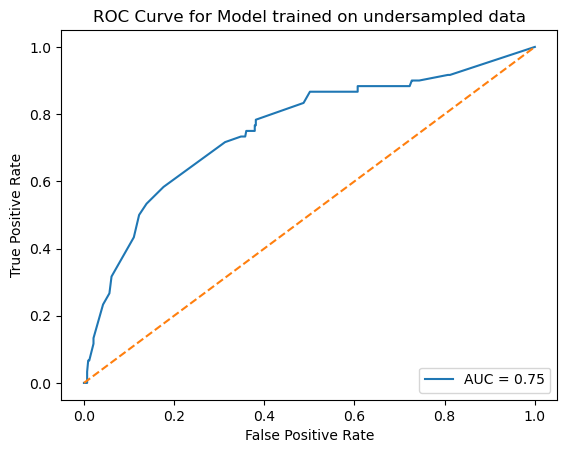

In [15]:
# Best 15 features
selected_features = X_train.columns[rfe.ranking_ <= 15]
model, train_acc, val_acc = trainRFClassisfier_OS(X_train[selected_features], y_train)
y_pred = model.predict(X_test[selected_features])
cm = confusion_matrix(y_test, y_pred)
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
print("Confusion Matrix:")
print(cm)
print("Training accuracy:", train_acc, "Validation accuracy:", val_acc)
print("Test accuracy:", model.score(X_test[selected_features], y_test))
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test[selected_features])[:, 1])
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc(fpr, tpr)).plot()
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve for Model trained on undersampled data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## **Training models by including rankwise features (Oversampling)**


In [16]:
accuracies = []
sensitivities = []
specificities = []

for i in range(5, 41):
  selected_features = X_train.columns[rfe.ranking_ <= i]
  model, train_acc, val_acc = trainRFClassisfier_US(X_train[selected_features], y_train)
  y_pred = model.predict(X_test[selected_features])
  cm = confusion_matrix(y_test, y_pred)
  accuracies.append(model.score(X_test[selected_features], y_test))
  sensitivities.append(cm[0, 0] / (cm[0, 0] + cm[0, 1]))
  specificities.append(cm[1, 1] / (cm[1, 0] + cm[1, 1]))


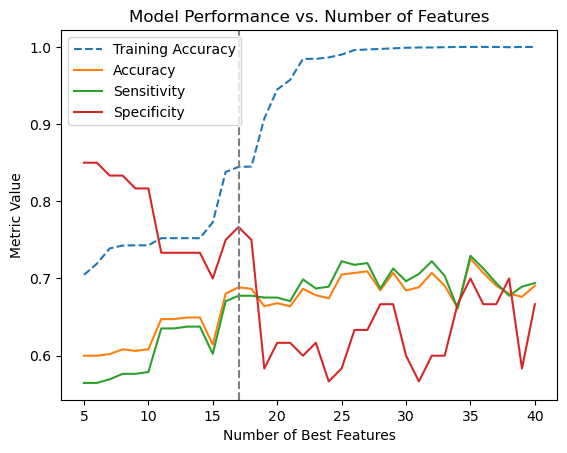

In [17]:
# Plot the results
plt.plot(range(5, 41), tr_acc, label="Training Accuracy", linestyle='--')
plt.plot(range(5, 41), accuracies, label="Accuracy")
plt.plot(range(5, 41), sensitivities, label="Sensitivity")
plt.plot(range(5, 41), specificities, label="Specificity")
#plt.plot(range(5, 41), precisions, label="Precision")
plt.xlabel("Number of Best Features")
plt.ylabel("Metric Value")
plt.title("Model Performance vs. Number of Features")
plt.legend()
plt.axvline(x=17, color='grey', linestyle='--')
plt.show()

## **Final model with best 17 features**
> This model is based on model training performed by undersampling

Confusion Matrix:
[[288 137]
 [ 14  46]]
Training accuracy: 0.8036649214659686 Validation accuracy: 0.6666666666666666
Test accuracy: 0.688659793814433
Sensitivity: 0.6776470588235294
Specificity: 0.7666666666666667
Precision: 0.25136612021857924


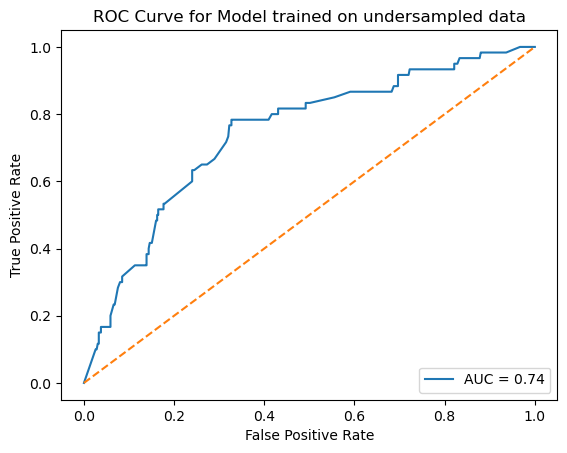

In [18]:
# Best 18 features
selected_features = X_train.columns[rfe.ranking_ <= 17]
model, train_acc, val_acc = trainRFClassisfier_US(X_train[selected_features], y_train)
y_pred = model.predict(X_test[selected_features])
cm = confusion_matrix(y_test, y_pred)
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
print("Confusion Matrix:")
print(cm)
print("Training accuracy:", train_acc, "Validation accuracy:", val_acc)
print("Test accuracy:", model.score(X_test[selected_features], y_test))
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test[selected_features])[:, 1])
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc(fpr, tpr)).plot()
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve for Model trained on undersampled data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#**Final set of top 15 features**

In [19]:
ranked_features = sorted(zip(rfe.ranking_, X.columns), key=lambda x: x[0])
for i in range(15):
  print(ranked_features[i][1])


Chinese
AgeGrpB
Filipino
BornInUSA
MedConditions_HeartCondition
Mexican
White
OthHisp
OthPacIsl
Japanese
MedConditions_LungDisease
AsInd
Vietnamese
Korean
MedConditions_Depression
